## Basic Project of ML

####  In this project we are going to perform the all the ML steps on the given data set and what are the steps is given below:
   - Preprocess
   - extract input and output cell 
   - scale the values 
   - train test split 
   -  train the model 
   - evaluate the model 
   - deploy the model 

In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
# importing the data set 

df= pd.read_csv("placement.csv")

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [ ]:
df.shape

(100, 4)

In [ ]:
# pre processing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
import matplotlib.pyplot as plt


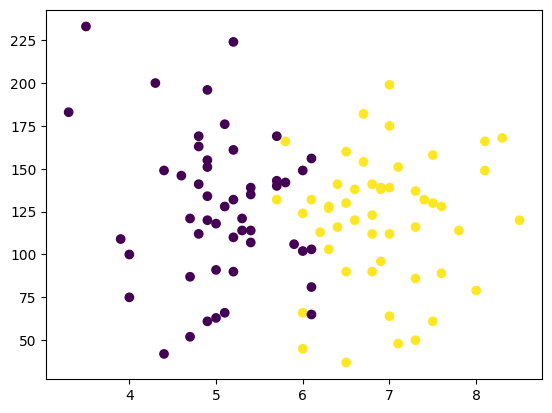

In [ ]:

plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [ ]:
# extracting the features and labels
X = df.iloc[:,0:2]

In [ ]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [ ]:
Y = df.iloc[:,-1]

In [ ]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [ ]:
# splitting the data set into training and testing sets

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1) #split the data into 90% training and 10% testing

In [ ]:
X_train

,cgpa,iq
41,5.4,114.0
64,7.0,64.0
93,6.8,112.0
10,6.0,45.0
63,6.3,128.0
...,...,...
87,5.7,132.0
65,8.1,166.0
38,6.5,160.0
85,5.8,166.0


In [ ]:
X_test

,cgpa,iq
15,5.1,176.0
20,6.6,120.0
51,4.8,141.0
32,7.0,139.0
31,3.9,109.0
2,5.3,121.0
84,5.7,169.0
52,7.0,175.0
88,4.4,149.0
5,7.1,48.0


In [ ]:
Y_train

41    0
64    1
93    1
10    1
63    1
     ..
87    1
65    1
38    1
85    1
28    0
Name: placement, Length: 90, dtype: int64

In [ ]:
Y_test

15    0
20    1
51    0
32    1
31    0
2     0
84    0
52    1
88    0
5     1
Name: placement, dtype: int64

In [ ]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_train

In [ ]:
X_test = scaler.transform(X_test)

In [ ]:
# training the model 

from sklearn.linear_model import LogisticRegression

In [ ]:
cf = LogisticRegression()

In [ ]:
# model training 
cf.fit(X_train,Y_train)

In [ ]:
# testing the model on the training data 

y_pred= cf.predict(X_test)

In [ ]:
# evaluating the model performance

from sklearn.metrics import accuracy_score


In [ ]:
accuracy_score(Y_test,y_pred)

In [ ]:
# deploying the model 

import pickle

In [ ]:
pickle.dump(cf,open('model.pkl','wb'))